In [32]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
from math import sqrt
import seaborn as sns 

In [5]:
#Importing Dataset 
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
sample_prediction = pd.read_csv('sample_prediction.csv')

In [11]:
print('Data Size for Train Data is:',data_train.shape)
print('Data Size for Test Data is:',data_test.shape)

Data Size for Train Data is: (8000, 21)
Data Size for Test Data is: (2000, 20)


## Exploratory Data Analysis

### Train Data

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
att1     8000 non-null float64
att2     8000 non-null float64
att3     8000 non-null int64
att4     8000 non-null int64
att5     8000 non-null int64
att6     8000 non-null int64
att7     8000 non-null int64
att8a    8000 non-null int64
att8b    8000 non-null int64
att8c    8000 non-null int64
att8d    8000 non-null int64
att8e    8000 non-null int64
att8f    8000 non-null int64
att8g    8000 non-null int64
att8h    8000 non-null int64
att8i    8000 non-null int64
att8j    8000 non-null int64
att9a    8000 non-null int64
att9b    8000 non-null int64
att9c    8000 non-null int64
att10    8000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 1.3 MB


In [20]:
data_train.describe()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.612260,0.717594,3.791375,201.245000,3.486375,0.145375,0.020625,0.080125,0.053875,0.05075,...,0.040625,0.055375,0.060000,0.274750,0.151250,0.184375,0.080875,0.484375,0.434750,0.239875
std,0.248338,0.170957,1.230463,49.837947,1.446055,0.352501,0.142134,0.271504,0.225785,0.21950,...,0.197432,0.228725,0.237502,0.446416,0.358315,0.387814,0.272660,0.499787,0.495755,0.427034
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_train.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8a    0
att8b    0
att8c    0
att8d    0
att8e    0
att8f    0
att8g    0
att8h    0
att8i    0
att8j    0
att9a    0
att9b    0
att9c    0
att10    0
dtype: int64

No Null data in the dataset.

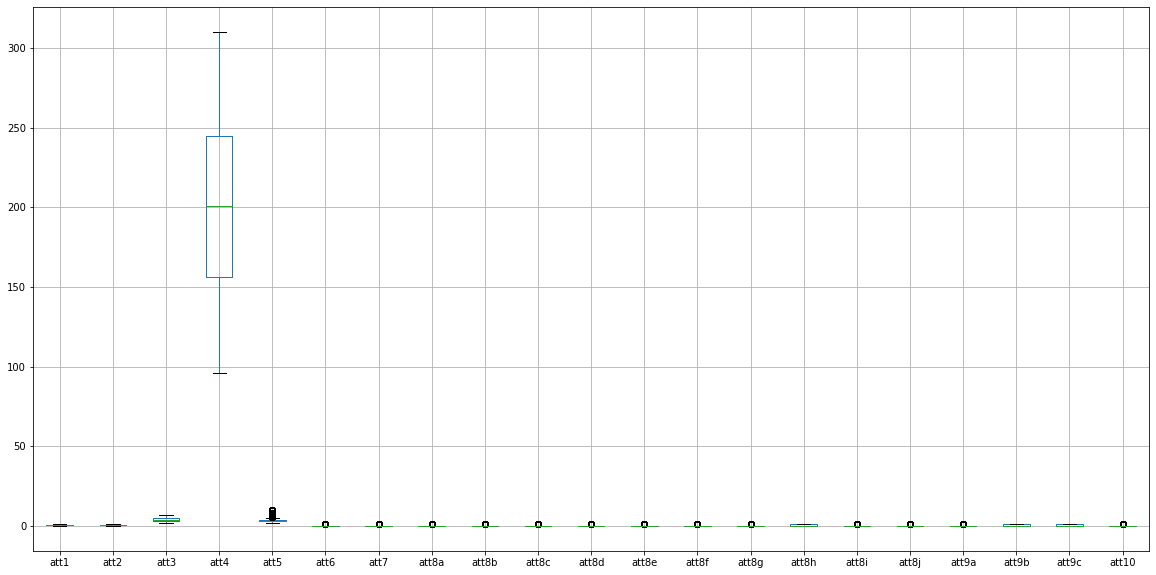

In [30]:
plt.figure(figsize=(20,10))
data_train.boxplot()
plt.show() 

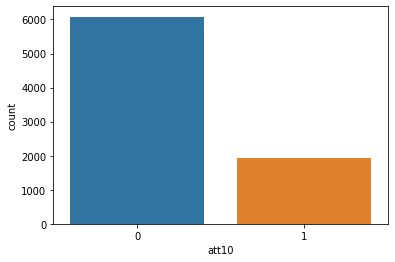

In [33]:
sns.countplot(data_train.att10) 

### Test Data

In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
att1     2000 non-null float64
att2     2000 non-null float64
att3     2000 non-null int64
att4     2000 non-null int64
att5     2000 non-null int64
att6     2000 non-null int64
att7     2000 non-null int64
att8a    2000 non-null int64
att8b    2000 non-null int64
att8c    2000 non-null int64
att8d    2000 non-null int64
att8e    2000 non-null int64
att8f    2000 non-null int64
att8g    2000 non-null int64
att8h    2000 non-null int64
att8i    2000 non-null int64
att8j    2000 non-null int64
att9a    2000 non-null int64
att9b    2000 non-null int64
att9c    2000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 312.6 KB


In [25]:
data_test.describe()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.606350,0.71492,3.848500,202.073500,3.486500,0.14250,0.018500,0.085000,0.058500,0.043000,0.053500,0.043500,0.058500,0.063500,0.28400,0.138000,0.172500,0.075000,0.490500,0.434500
std,0.254255,0.17095,1.265839,50.363005,1.429279,0.34965,0.134784,0.278951,0.234745,0.202908,0.225085,0.204031,0.234745,0.243921,0.45105,0.344986,0.377909,0.263457,0.500035,0.495815
min,0.090000,0.36000,2.000000,96.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,0.56000,3.000000,156.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.72000,4.000000,202.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.810000,0.87000,5.000000,247.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.00000,7.000000,310.000000,10.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_test.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8a    0
att8b    0
att8c    0
att8d    0
att8e    0
att8f    0
att8g    0
att8h    0
att8i    0
att8j    0
att9a    0
att9b    0
att9c    0
dtype: int64

## Feature Selection

### Correlation Matrix of Train Data

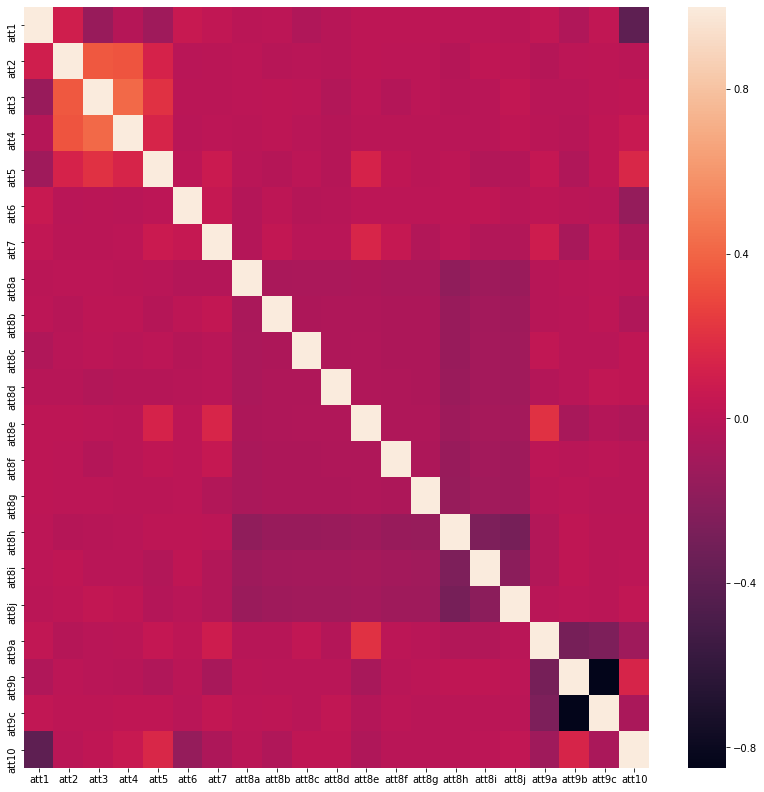

In [34]:
plt.subplots(figsize=(14, 14))
sns.heatmap(data_train.corr())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


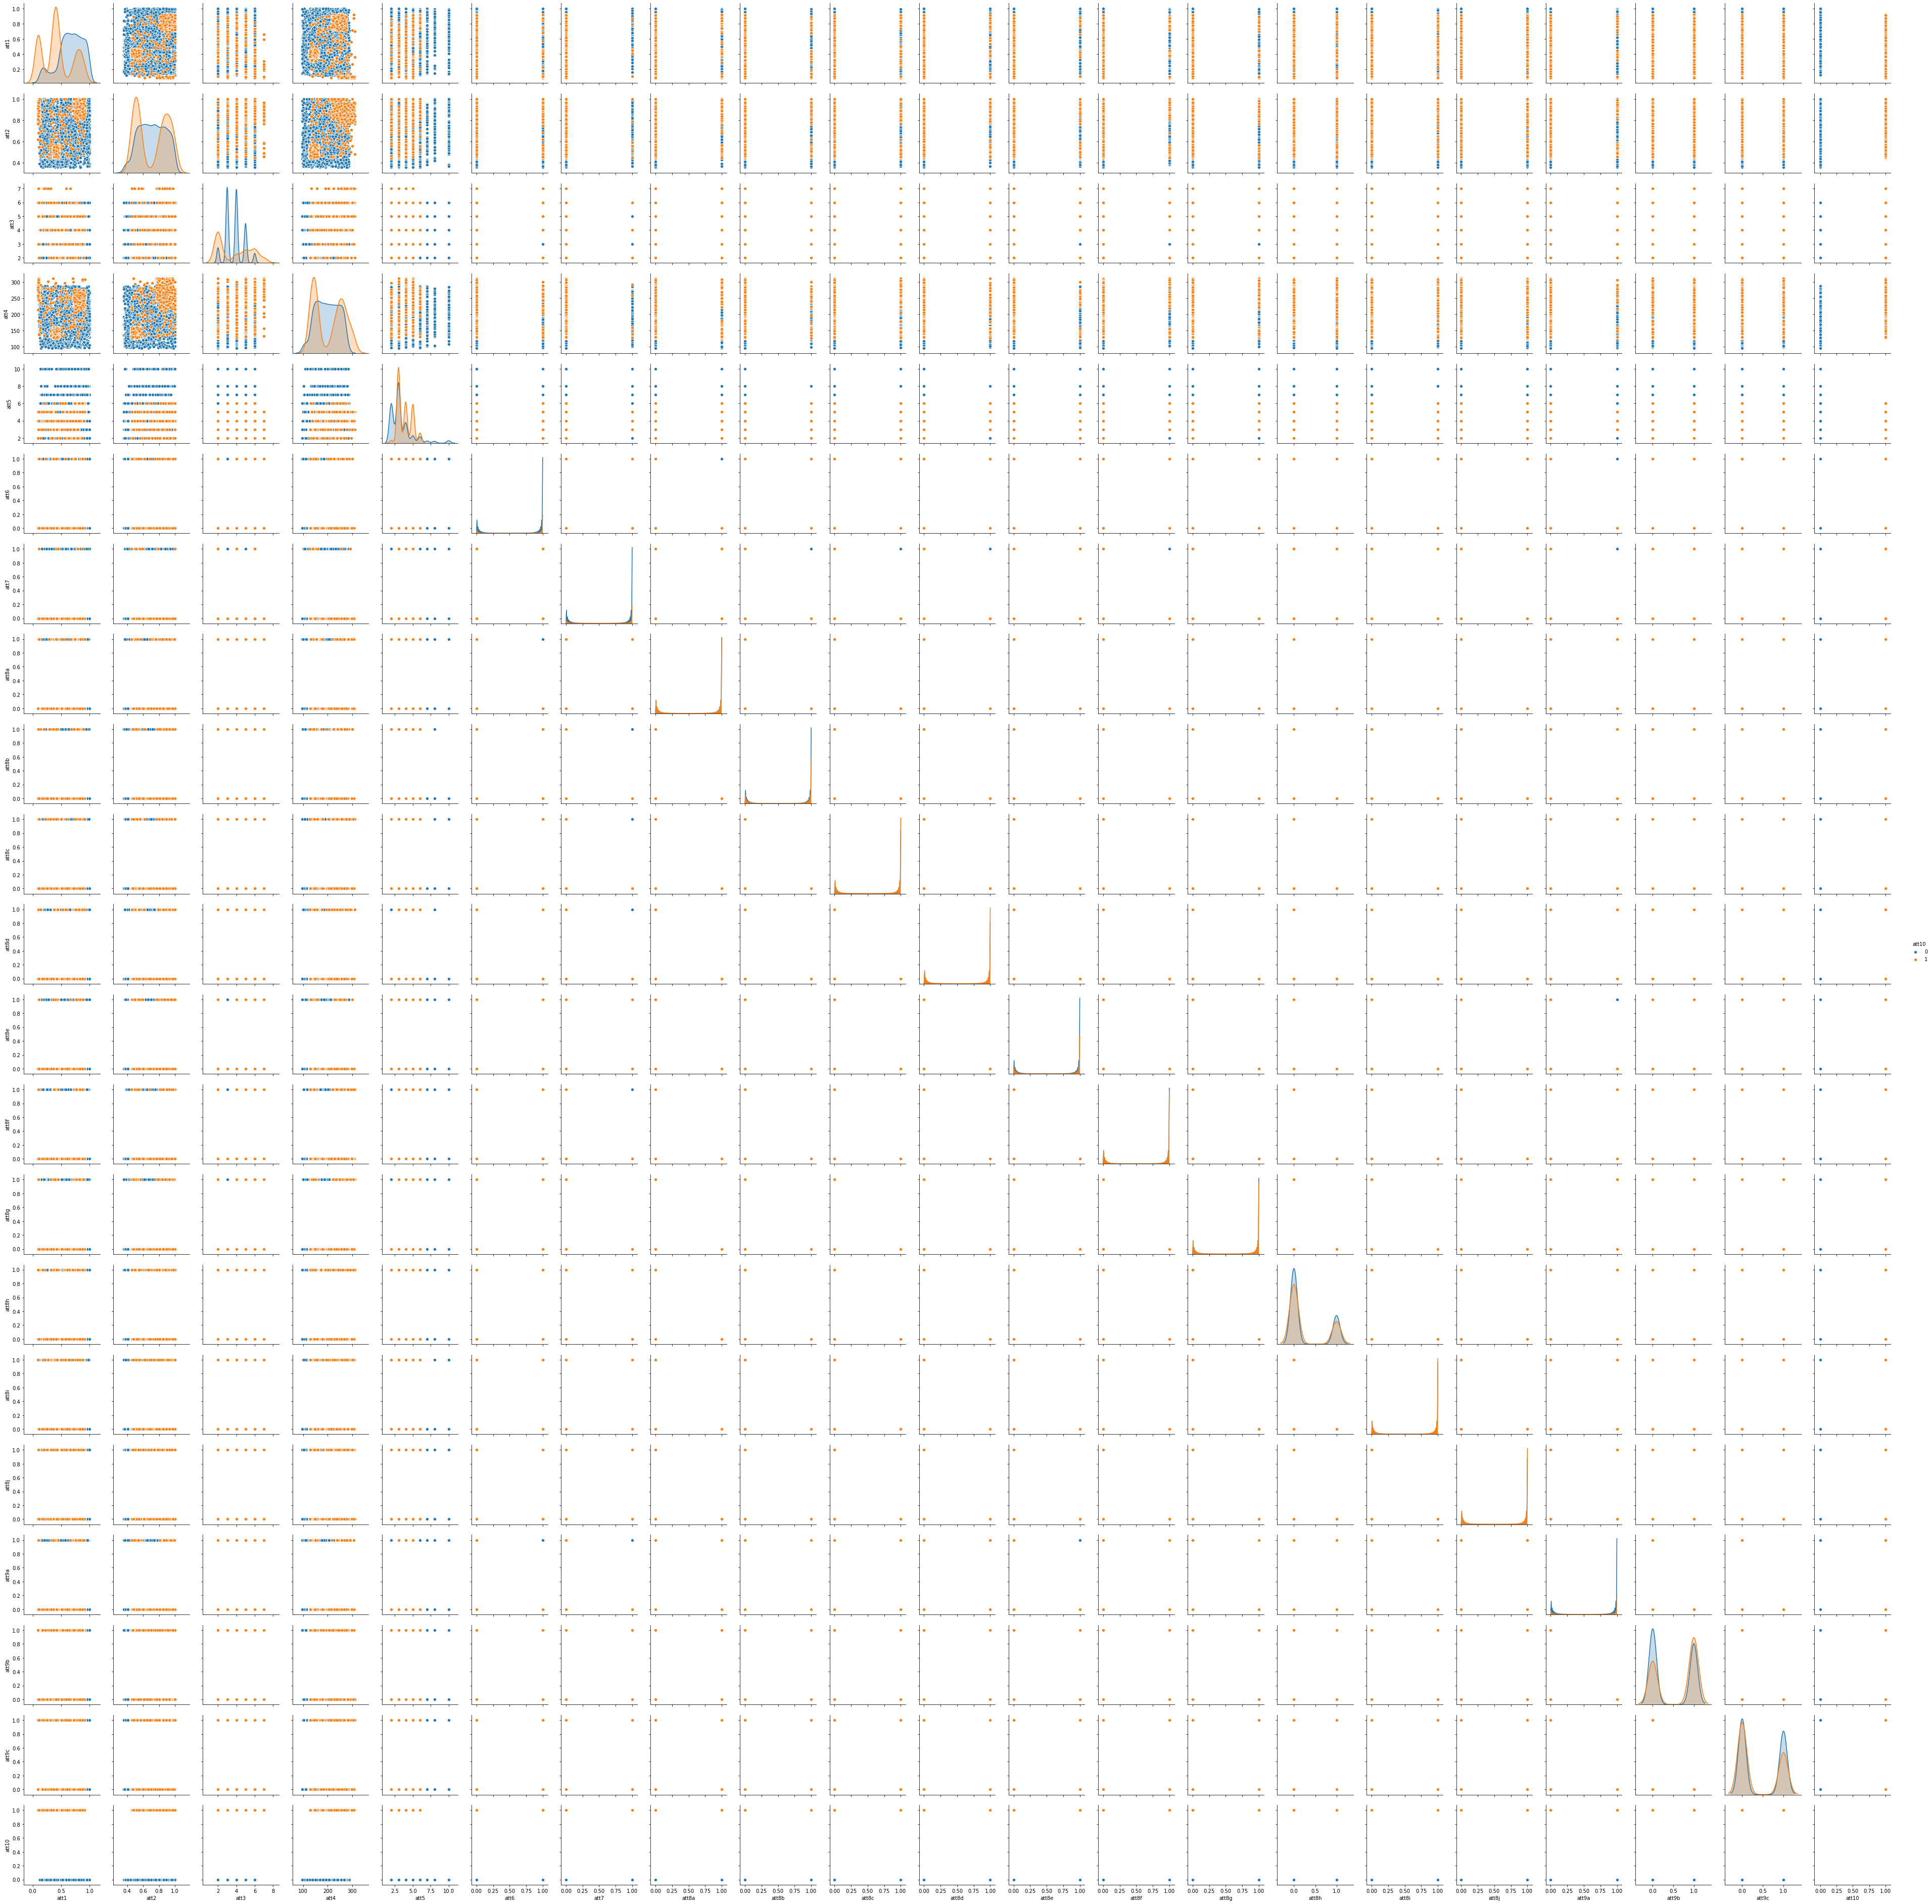

In [45]:
sns.pairplot(data_train,hue="att10")

In [36]:
# Create correlation matrix
corr_matrix = data_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['att9c']

In [49]:
data_train_1= data_train.drop(data_train[to_drop], axis = 1)

## Train Test Split

In [157]:
#set as array
data_train_1_array = np.asarray(data_train_1)
X ,y = data_train_1_array[:,0:19],data_train_1_array[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state = 42)

## Supervised Learning

### 1. K-Nearest Neighbors

In [158]:
#kNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 9, metric = 'euclidean')
knn.fit(X_train,y_train)

#prediction
y_pred_knn_train = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

#Cconfusion Matrix
conf_mat_train_knn = metrics.confusion_matrix(y_test,y_pred_knn , labels = [1,0])

print("Confusion Matrix for KNN Model:")
print(conf_mat_train_knn)

Confusion Matrix for KNN Model:
[[ 687   54]
 [ 162 2297]]


In [159]:
fpr_train_knn, tpr_train_knn, threshold = metrics.roc_curve(y_train, y_pred_knn_train)
fpr_test_knn, tpr_test_knn, threshold = metrics.roc_curve(y_test, y_pred_knn)

In [160]:
akurasi_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy Score of kNN Model is:",akurasi_knn)
print('AUC train KNN = {}'.format(metrics.auc(fpr_train_knn,tpr_train_knn)))
print('AUC test KNN = {}'.format(metrics.auc(fpr_test_knn,tpr_test_knn)))

Accuracy Score of kNN Model is: 0.9325
AUC train KNN = 0.9302428378171878
AUC test KNN = 0.9306225334349733


### 2. Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

#prediction
y_pred_dt_train = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

#Confusion Matrix
conf_mat_dt = metrics.confusion_matrix(y_test,y_pred_dt , labels = [1,0])

print("Confusion Matrix for KNN Model:")
print(conf_mat_dt)

Confusion Matrix for KNN Model:
[[ 700   41]
 [  56 2403]]


In [162]:
fpr_train_dt, tpr_train_dt, threshold = metrics.roc_curve(y_train, y_pred_dt_train)
fpr_test_dt, tpr_test_dt, threshold = metrics.roc_curve(y_test, y_pred_dt)

print("Accuracy Score of Decision Tree Model is:",metrics.accuracy_score(y_test, y_pred_dt))
print('AUC train Decision Tree = {}'.format(metrics.auc(fpr_train_dt,tpr_train_dt)))
print('AUC test Decision Tree = {}'.format(metrics.auc(fpr_test_dt,tpr_test_dt)))

Accuracy Score of Decision Tree Model is: 0.9696875
AUC train Decision Tree = 1.0
AUC test Decision Tree = 0.9609479402827148


### 3. Logistic Regression

In [163]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
y_pred_lr_train = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

#Confusion Matrix
conf_mat_lr = metrics.confusion_matrix(y_test,y_pred_lr , labels = [1,0])

print("Confusion Matrix for Logistic Regression Model:")
print(conf_mat_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for Logistic Regression Model:
[[ 311  430]
 [ 188 2271]]


In [164]:
fpr_train_lr, tpr_train_lr, threshold = metrics.roc_curve(y_train, y_pred_lr_train)
fpr_test_lr, tpr_test_lr, threshold = metrics.roc_curve(y_test, y_pred_lr)

print("Accuracy Score of Logistic Regression Model is:",metrics.accuracy_score(y_test, y_pred_lr))
print('AUC train LR = {}'.format(metrics.auc(fpr_train_lr,tpr_train_lr)))
print('AUC test LR = {}'.format(metrics.auc(fpr_test_lr,tpr_test_lr)))

Accuracy Score of Logistic Regression Model is: 0.806875
AUC train LR = 0.6763942104419417
AUC test LR = 0.671624630444005


### 4. Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#prediction
y_pred_nb_train = nb.predict(X_train)
y_pred_nb = nb.predict(X_test)

#Confusion Matrix
conf_mat_nb = metrics.confusion_matrix(y_test,y_pred_nb , labels = [1,0])

print("Confusion Matrix for Logistic Regression Model:")
print(conf_mat_nb)

Confusion Matrix for Logistic Regression Model:
[[ 614  127]
 [ 942 1517]]


In [166]:
fpr_train_nb, tpr_train_nb, threshold = metrics.roc_curve(y_train, y_pred_nb_train)
fpr_test_nb, tpr_test_nb, threshold = metrics.roc_curve(y_test, y_pred_nb)

print("Accuracy Score of Naive Bayes Model is:",metrics.accuracy_score(y_test, y_pred_nb))
print('AUC train NB = {}'.format(metrics.auc(fpr_train_nb,tpr_train_nb)))
print('AUC test NB = {}'.format(metrics.auc(fpr_test_nb,tpr_test_nb)))

Accuracy Score of Naive Bayes Model is: 0.6659375
AUC train NB = 0.7196771474829822
AUC test NB = 0.7227637163105154


### 5. Voting Classifier

In [167]:
from sklearn.ensemble import VotingClassifier
# Create voting classifier
clf_voting = VotingClassifier(estimators=[
    ('knn', knn),
    ('dt', dt),
    ('nb', nb)])

clf_voting.fit(X_train, y_train)
#prediction
y_pred_vt_train = clf_voting.predict(X_train)
y_pred_vt = clf_voting.predict(X_test)

#Confusion Matrix
conf_mat_vt = metrics.confusion_matrix(y_test,y_pred_vt , labels = [1,0])

print("Confusion Matrix for Voting Classifier:")
print(conf_mat_vt)

Confusion Matrix for Voting Classifier:
[[ 704   37]
 [ 128 2331]]


In [168]:
fpr_train_vt, tpr_train_vt, threshold = metrics.roc_curve(y_train, y_pred_vt_train)
fpr_test_vt, tpr_test_vt, threshold = metrics.roc_curve(y_test, y_pred_vt)

print("Accuracy Score of Voting Classifier Model is:",metrics.accuracy_score(y_test, y_pred_vt))
print('AUC train Voting = {}'.format(metrics.auc(fpr_train_vt,tpr_train_vt)))
print('AUC test Voting = {}'.format(metrics.auc(fpr_test_vt,tpr_test_vt)))

Accuracy Score of Voting Classifier Model is: 0.9484375
AUC train Voting = 0.9750630227088
AUC test Voting = 0.9490068980126984


### 6. Average Classifier

In [169]:
from sklearn.ensemble import VotingRegressor

clf_avg = VotingClassifier(estimators=[
    ('knn', knn),
    ('dt', dt),
    ('lr', lr),
    ('nb', nb)],
    voting='soft',
    weights = [4,4,1,2])

clf_avg.fit(X_train, y_train)
#prediction
y_pred_avg_train = clf_avg.predict(X_train)
y_pred_avg = clf_avg.predict(X_test)

#Confusion Matrix
conf_mat_avg = metrics.confusion_matrix(y_test,y_pred_avg , labels = [1,0])

print("Confusion Matrix for Voting Classifier:")
print(conf_mat_avg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for Voting Classifier:
[[ 706   35]
 [  69 2390]]


In [170]:
fpr_train_avg, tpr_train_avg, threshold = metrics.roc_curve(y_train, y_pred_avg_train)
fpr_test_avg, tpr_test_avg, threshold = metrics.roc_curve(y_test, y_pred_avg)

print("Accuracy Score of Average Classifier Model is:",metrics.accuracy_score(y_test, y_pred_avg))
print('AUC train Average = {}'.format(metrics.auc(fpr_train_vt,tpr_train_avg)))
print('AUC test Average = {}'.format(metrics.auc(fpr_test_vt,tpr_test_avg)))

Accuracy Score of Average Classifier Model is: 0.9675
AUC train Average = 0.9801564013166099
AUC test Average = 0.9503564256780155


### 7. Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#prediction
y_pred_rf_train = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

#Confusion Matrix
conf_mat_rf = metrics.confusion_matrix(y_test,y_pred_rf , labels = [1,0])

print("Confusion Matrix for Logistic Regression Model:")
print(conf_mat_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix for Logistic Regression Model:
[[ 684   57]
 [  10 2449]]


In [181]:
fpr_train_rf, tpr_train_rf, threshold = metrics.roc_curve(y_train, y_pred_rf_train)
fpr_test_rf, tpr_test_rf, threshold = metrics.roc_curve(y_test, y_pred_rf)

print("Accuracy Score of Average Classifier Model is:",metrics.accuracy_score(y_test, y_pred_rf))
print('AUC train Average = {}'.format(metrics.auc(fpr_train_vt,tpr_train_rf)))
print('AUC test Average = {}'.format(metrics.auc(fpr_test_vt,tpr_test_rf)))

Accuracy Score of Average Classifier Model is: 0.9790625
AUC train Average = 0.9788830566646572
AUC test Average = 0.935511621359527


### 8. Stacking

Stacking using 3 models with: Decision Tree, kNN, Naive Bayes, and meta classifier:Random Forest.  

In [228]:
pred_df = pd.DataFrame({'pred_dt':y_pred_dt_train,'pred_knn':y_pred_knn_train,'pred_nb':y_pred_nb_train})
pred_df_test = pd.DataFrame({'pred_dt':y_pred_dt,'pred_knn':y_pred_knn,'pred_nb':y_pred_nb})

meta_cls = RandomForestClassifier()
meta_cls.fit(pred_df,y_train)
#prediction
y_pred_meta_train = meta_cls.predict(pred_df)
y_pred_meta = meta_cls.predict(pred_df_test)

#Confusion Matrix
conf_mat_meta = metrics.confusion_matrix(y_test,y_pred_meta , labels = [1,0])

print("Confusion Matrix for Logistic Regression Model:")
print(conf_mat_meta)

Confusion Matrix for Logistic Regression Model:
[[ 700   41]
 [  56 2403]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [229]:
fpr_train_meta, tpr_train_meta, threshold = metrics.roc_curve(y_train, y_pred_meta_train)
fpr_test_meta, tpr_test_meta, threshold = metrics.roc_curve(y_test, y_pred_meta)

print("Accuracy Score of Stacking Classifier Model is:",metrics.accuracy_score(y_test, y_pred_meta))
print('AUC train Stacking = {}'.format(metrics.auc(fpr_train_meta,tpr_train_meta)))
print('AUC test Stacking = {}'.format(metrics.auc(fpr_test_meta,tpr_test_meta)))

Accuracy Score of Stacking Classifier Model is: 0.9696875
AUC train Stacking = 1.0
AUC test Stacking = 0.9609479402827148


### Conclusion of Supervised Learning

In [230]:
print("The highest AUC of Models reached by Stacking and Decision Tree Model, with:")
print('AUC train Stacking = {}'.format(metrics.auc(fpr_train_meta,tpr_train_meta)))
print('AUC test Stacking = {}'.format(metrics.auc(fpr_test_meta,tpr_test_meta)))

The highest AUC of Models reached by Stacking and Decision Tree Model, with:
AUC train Stacking = 1.0
AUC test Stacking = 0.9609479402827148


## Prediction of Test dataset using Stacking Model.

In [231]:
data_test.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8a',
       'att8b', 'att8c', 'att8d', 'att8e', 'att8f', 'att8g', 'att8h', 'att8i',
       'att8j', 'att9a', 'att9b', 'att9c'],
      dtype='object')

In [236]:
#drop att9c column
data_test_predict = data_test.loc[:,data_test.columns != 'att9c']
data_test_predict.shape

(2000, 19)

In [240]:
data_test_predict_array = np.asarray(data_test_predict)
pred_dt = dt.predict(data_test_predict)
pred_knn = knn.predict(data_test_predict)
pred_nb = nb.predict(data_test_predict)
prediction_df = pd.DataFrame({'pred_dt':pred_dt,'pred_knn':pred_knn,'pred_nb':pred_nb})

prediction = meta_cls.predict(prediction_df)
prediction

array([0., 0., 1., ..., 1., 0., 0.])

In [280]:

prediction_table = pd.DataFrame(prediction, columns=['Prediction'])
prediction_table['no']= range(1, 1+len(prediction_table))
prediction_table = prediction_table[['no','Prediction']]
prediction_table.set_index('no')
prediction_table.head()

,no,Prediction
0,1,0.0
1,2,0.0
2,3,1.0
3,4,1.0
4,5,1.0


In [276]:
#exporting csv
prediction_table.to_csv('prediction_table.csv')

## Unsupervised Learning

In [288]:
#selecting att1 and att2
uns_train = data_train[['att1','att2']]
uns_test = data_test[['att1','att2']]
uns_data = pd.concat([uns_train,uns_test],axis=0)
uns_data.shape

(10000, 2)

In [289]:
uns_data.head()

,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


In [292]:
#transform data to array
X = np.asarray(uns_data)

#### Data Plot

Text(0.5, 1.0, 'Employee Graph')

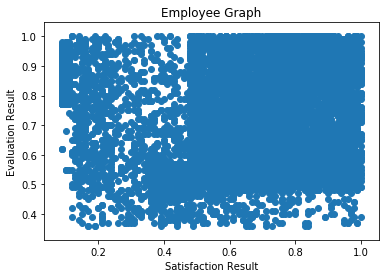

In [294]:
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Satisfaction Result")
plt.ylabel("Evaluation Result")
plt.title("Employee Graph")

### K-Means Clustering

In [290]:
from sklearn.cluster import KMeans
%matplotlib inline

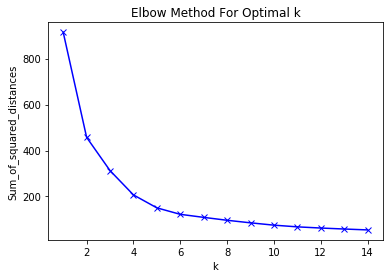

In [296]:
#Scree Plotting
Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [307]:
#KMeans Algorithm Activation
km = KMeans (n_clusters=4)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [308]:
#Centroid Values
km.cluster_centers_

array([[0.46259   , 0.55267389],
       [0.7418951 , 0.88218487],
       [0.16577708, 0.82983516],
       [0.835058  , 0.61630489]])

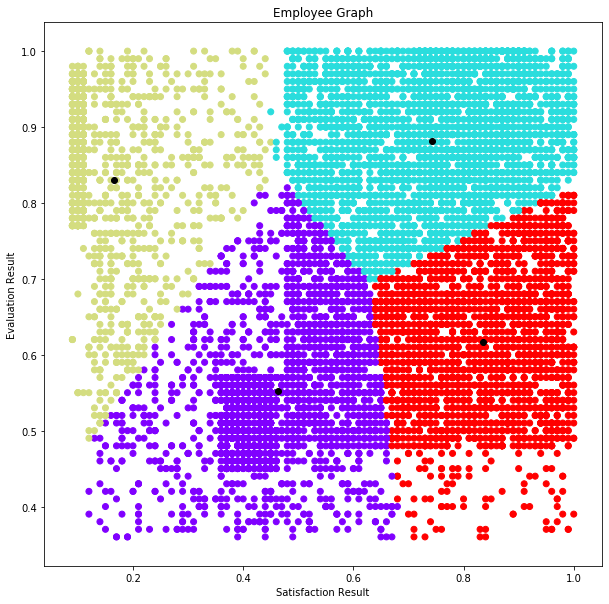

In [310]:
# Result Visualization
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.xlabel("Satisfaction Result")
plt.ylabel("Evaluation Result")
plt.title("Employee Graph")
plt.show()

#### Labelling

In [314]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(km.labels_)
#data_clustered.cluster.value_counts()
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

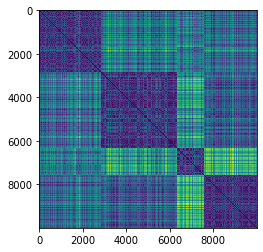

In [315]:
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

### Hierarchy Clustering

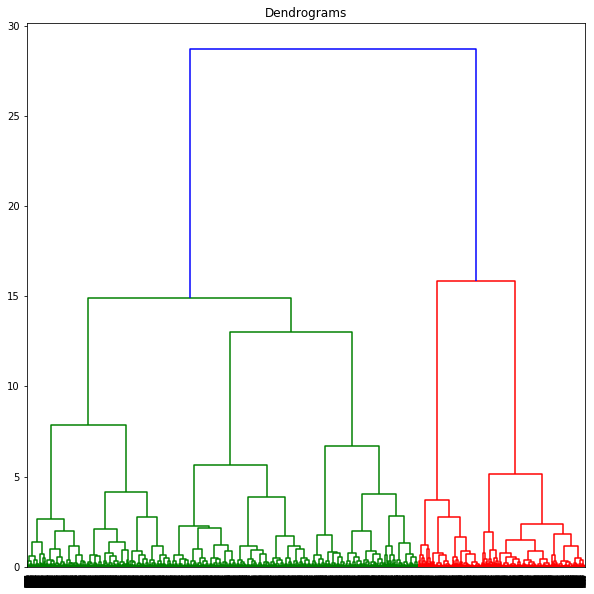

In [317]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

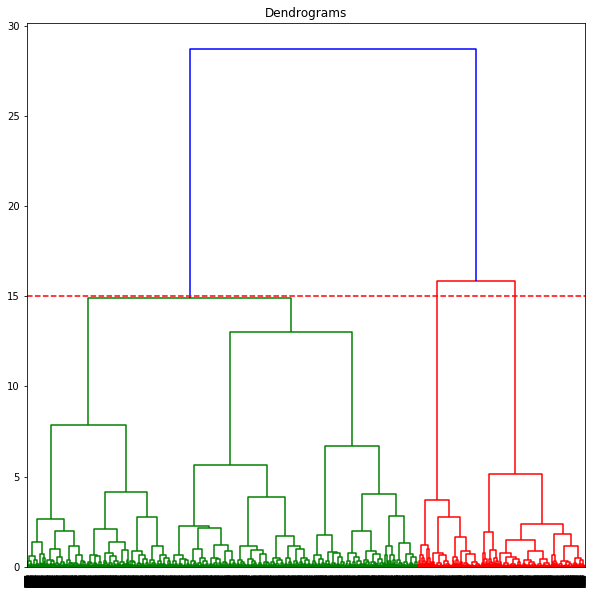

In [318]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

In [326]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([2, 3, 3, ..., 3, 2, 1], dtype=int64)

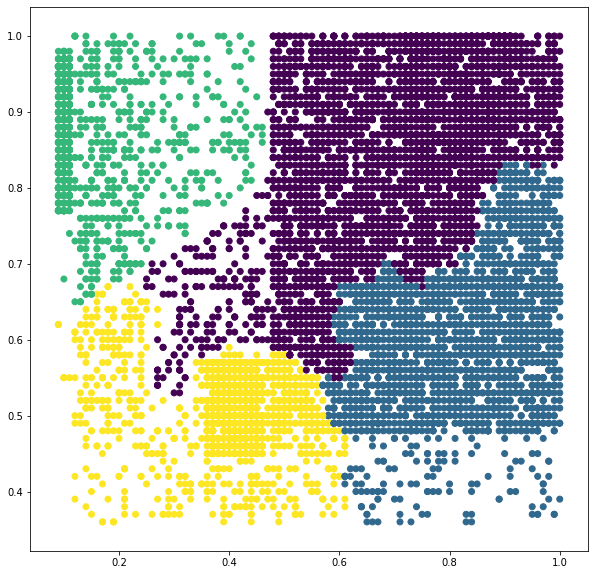

In [327]:
plt.figure(figsize=(10, 10))  
plt.scatter(X[:,0],X[:,1], c=cluster.labels_) 

Labelling:
    1. Unhappy Low Performer
    2. Happy High Performer
    3. Unhappy High Performer
    4. Happy Low Performer
[Source: Putting Performance and Happiness Together in the Workplace](https://gbr.pepperdine.edu/2010/08/putting-performance-and-happiness-together-in-the-workplace/)

### DBSCAN

In [349]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

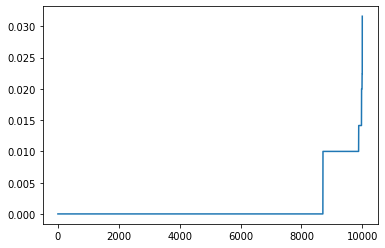

In [352]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [388]:
dbscan = DBSCAN(eps=0.015)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.015, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [390]:
dbscan.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

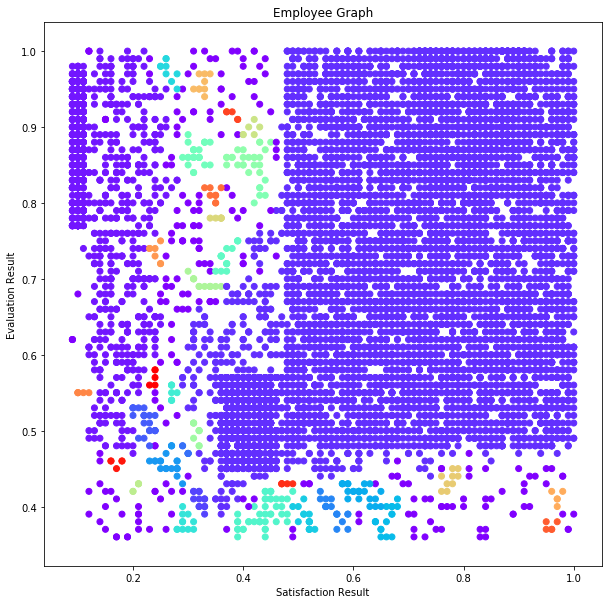

In [389]:
# Step 7 Visualisasi Hasil 
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Satisfaction Result")
plt.ylabel("Evaluation Result")
plt.title("Employee Graph")
plt.show()